In [1]:
# Weight History Analysis - Last 3 Weeks Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")
print("Ready to analyze weight history data...")

Libraries imported successfully!
Ready to analyze weight history data...


In [2]:
# Load the weight history data
df = pd.read_csv('../data/raw/weight_history.csv')

# Display basic info about the dataset
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

print("\nLast few rows:")
print(df.tail())

Dataset Info:
Shape: (2120, 7)
Columns: ['Weight (lb)', 'Body Fat', 'Muscle Mass', 'Water', 'BMI', 'Bone Mass', 'Date/Time']

First few rows:
   Weight (lb) Body Fat Muscle Mass Water   BMI Bone Mass  \
0        208.2       0%          0%    0%  28.2        0%   
1        208.2       0%          0%    0%  28.2        0%   
2        212.6       0%          0%    0%  28.8        0%   
3        211.6       0%          0%    0%  28.7        0%   
4        200.6       0%          0%    0%  27.2        0%   

                 Date/Time  
0  Nov 14 2017 09:24:43 PM  
1  Nov 14 2017 09:25:44 PM  
2  Nov 14 2017 09:28:06 PM  
3  Nov 14 2017 09:30:07 PM  
4  Nov 15 2017 08:12:12 AM  

Last few rows:
      Weight (lb) Body Fat Muscle Mass  Water   BMI Bone Mass  \
2115        185.0    17.1%         36%  65.1%  25.1        0%   
2116        184.8    17.1%         36%  65.1%  25.1        0%   
2117        184.4      17%       36.1%  65.3%  25.0        0%   
2118        182.6    16.6%       36.3%  6

In [3]:
# Clean and process the data
# Convert Date/Time column to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Clean the Weight column (remove 'lb' and convert to float)
df['Weight'] = df['Weight (lb)'].astype(float)

# Sort by date
df = df.sort_values('Date/Time').reset_index(drop=True)

# Display date range
print(f"Date range: {df['Date/Time'].min()} to {df['Date/Time'].max()}")
print(f"Total data points: {len(df)}")

# Check for any missing values in key columns
print(f"\nMissing values:")
print(f"Weight: {df['Weight'].isna().sum()}")
print(f"Date/Time: {df['Date/Time'].isna().sum()}")

Date range: 2017-11-14 21:24:43 to 2025-08-24 06:37:17
Total data points: 2120

Missing values:
Weight: 0
Date/Time: 0


C:\Users\matts\AppData\Local\Temp\ipykernel_39788\2381114980.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date/Time'] = pd.to_datetime(df['Date/Time'])


In [4]:
# Filter data for the last 3 weeks (21 days)
end_date = df['Date/Time'].max()
start_date = end_date - timedelta(days=21)

print(f"Filtering data from {start_date.date()} to {end_date.date()}")

# Filter the dataframe
df_recent = df[df['Date/Time'] >= start_date].copy()
print(f"Data points in last 3 weeks: {len(df_recent)}")

# Display the recent data
print("\nRecent weight data:")
print(df_recent[['Date/Time', 'Weight']].head(10))
print("...")
print(df_recent[['Date/Time', 'Weight']].tail(10))

Filtering data from 2025-08-03 to 2025-08-24
Data points in last 3 weeks: 21

Recent weight data:
               Date/Time  Weight
2099 2025-08-04 06:09:46   191.0
2100 2025-08-05 04:31:25   190.0
2101 2025-08-06 05:26:42   189.0
2102 2025-08-07 04:54:04   188.2
2103 2025-08-08 04:39:38   189.0
2104 2025-08-09 04:11:09   188.2
2105 2025-08-10 05:53:34   188.4
2106 2025-08-11 05:00:18   188.2
2107 2025-08-12 05:18:36   186.6
2108 2025-08-13 03:36:59   186.0
...
               Date/Time  Weight
2110 2025-08-15 04:46:39   185.4
2111 2025-08-16 04:39:14   185.6
2112 2025-08-17 05:01:54   185.2
2113 2025-08-18 05:06:24   185.0
2114 2025-08-19 04:50:12   185.4
2115 2025-08-20 04:34:06   185.0
2116 2025-08-21 04:49:24   184.8
2117 2025-08-22 04:32:41   184.4
2118 2025-08-23 07:25:15   182.6
2119 2025-08-24 06:37:17   183.4


In [5]:
# Prepare data for linear regression
# Convert datetime to days since start for regression
df_recent['days_since_start'] = (df_recent['Date/Time'] - start_date).dt.total_seconds() / (24 * 3600)

# Prepare X and y for regression
X = df_recent['days_since_start'].values.reshape(-1, 1)
y = df_recent['Weight'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Calculate R-squared score
r2 = r2_score(y, y_pred)

print(f"Linear Regression Results:")
print(f"Slope: {model.coef_[0]:.4f} lbs/day")
print(f"Intercept: {model.intercept_:.2f} lbs")
print(f"R-squared: {r2:.4f}")

# Calculate weight change over 3 weeks
weight_change_3weeks = model.coef_[0] * 21
print(f"Predicted weight change over 3 weeks: {weight_change_3weeks:.2f} lbs")

# Calculate daily average weight change
print(f"Daily weight change: {model.coef_[0]:.4f} lbs/day")

Linear Regression Results:
Slope: -0.3455 lbs/day
Intercept: 190.30 lbs
R-squared: 0.9225
Predicted weight change over 3 weeks: -7.26 lbs
Daily weight change: -0.3455 lbs/day


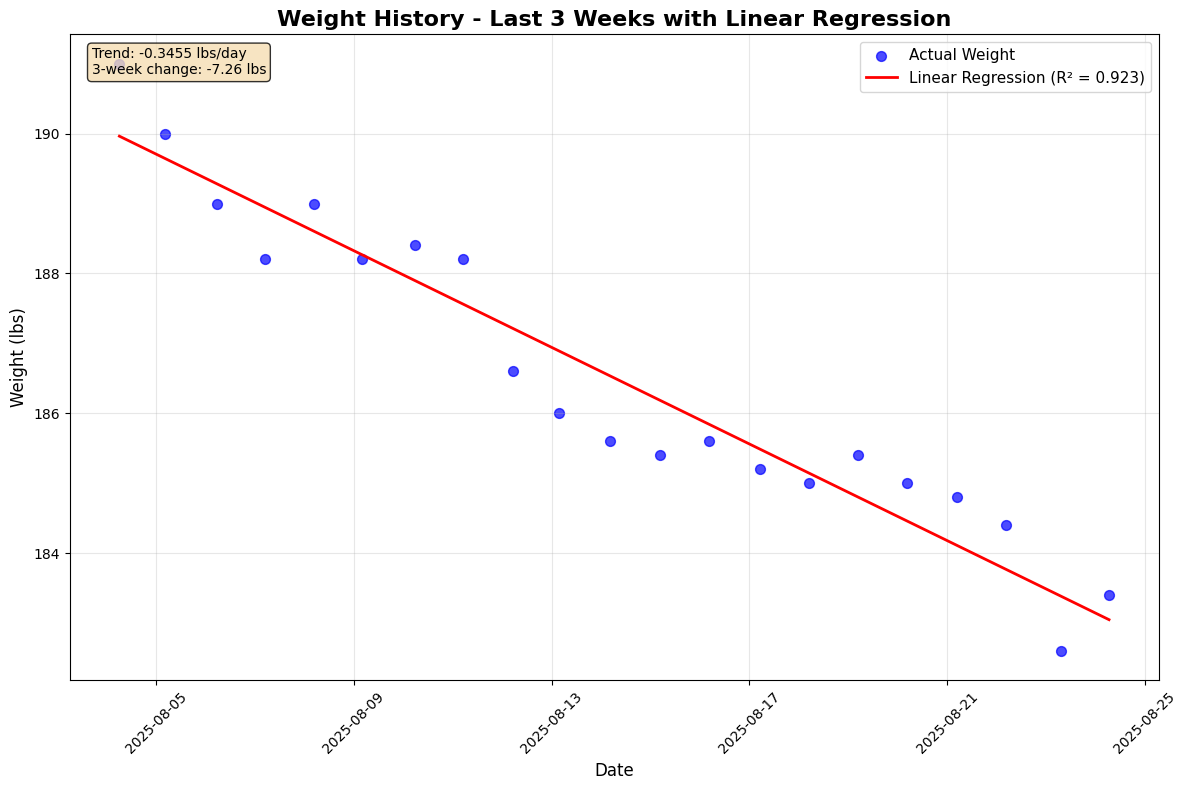


Summary Statistics for Last 3 Weeks:
Starting weight: 191.0 lbs
Ending weight: 183.4 lbs
Actual weight change: -7.60 lbs
Average weight: 186.52 lbs
Weight std deviation: 2.23 lbs


In [6]:
# Create the linear regression curve fit graph
plt.figure(figsize=(12, 8))

# Plot the actual weight data
plt.scatter(df_recent['Date/Time'], df_recent['Weight'], 
           alpha=0.7, s=50, color='blue', label='Actual Weight')

# Plot the regression line
plt.plot(df_recent['Date/Time'], y_pred, 
         color='red', linewidth=2, label=f'Linear Regression (R² = {r2:.3f})')

# Customize the plot
plt.title('Weight History - Last 3 Weeks with Linear Regression', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add trend information as text on the plot
trend_text = f"Trend: {model.coef_[0]:.4f} lbs/day\n"
trend_text += f"3-week change: {weight_change_3weeks:.2f} lbs"

# Position the text box
plt.text(0.02, 0.98, trend_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print(f"\nSummary Statistics for Last 3 Weeks:")
print(f"Starting weight: {df_recent['Weight'].iloc[0]:.1f} lbs")
print(f"Ending weight: {df_recent['Weight'].iloc[-1]:.1f} lbs")
print(f"Actual weight change: {df_recent['Weight'].iloc[-1] - df_recent['Weight'].iloc[0]:.2f} lbs")
print(f"Average weight: {df_recent['Weight'].mean():.2f} lbs")
print(f"Weight std deviation: {df_recent['Weight'].std():.2f} lbs")

In [7]:
# Extended Weight Prediction to September 29th, 2025
from datetime import datetime, timedelta
import pandas as pd

# Define prediction end date (September 29, 2025)
prediction_end_date = pd.to_datetime('2025-09-29')
print(f"Predicting weight from {end_date.date()} to {prediction_end_date.date()}")

# Calculate days from start_date to prediction_end_date
total_days = (prediction_end_date - start_date).days
print(f"Total prediction period: {total_days} days")

# Create extended date range for prediction
extended_dates = pd.date_range(start=start_date, end=prediction_end_date, freq='D')
extended_days_since_start = [(date - start_date).total_seconds() / (24 * 3600) for date in extended_dates]

# Generate predictions for the extended period
X_extended = np.array(extended_days_since_start).reshape(-1, 1)
y_extended_pred = model.predict(X_extended)

# Create DataFrame for extended predictions
df_extended = pd.DataFrame({
    'Date': extended_dates,
    'Predicted_Weight': y_extended_pred,
    'Data_Type': ['Actual' if date <= end_date else 'Predicted' for date in extended_dates]
})

print(f"Extended prediction range: {len(df_extended)} days")
print(f"Actual data points: {sum(df_extended['Data_Type'] == 'Actual')}")
print(f"Predicted data points: {sum(df_extended['Data_Type'] == 'Predicted')}")

# Show some sample predictions
print("\nSample predictions:")
future_data = df_extended[df_extended['Data_Type'] == 'Predicted'].head(10)
for _, row in future_data.iterrows():
    print(f"{row['Date'].strftime('%Y-%m-%d')}: {row['Predicted_Weight']:.1f} lbs")

Predicting weight from 2025-08-24 to 2025-09-29
Total prediction period: 56 days
Extended prediction range: 57 days
Actual data points: 22
Predicted data points: 35

Sample predictions:
2025-08-25: 182.7 lbs
2025-08-26: 182.4 lbs
2025-08-27: 182.0 lbs
2025-08-28: 181.7 lbs
2025-08-29: 181.3 lbs
2025-08-30: 181.0 lbs
2025-08-31: 180.6 lbs
2025-09-01: 180.3 lbs
2025-09-02: 179.9 lbs
2025-09-03: 179.6 lbs


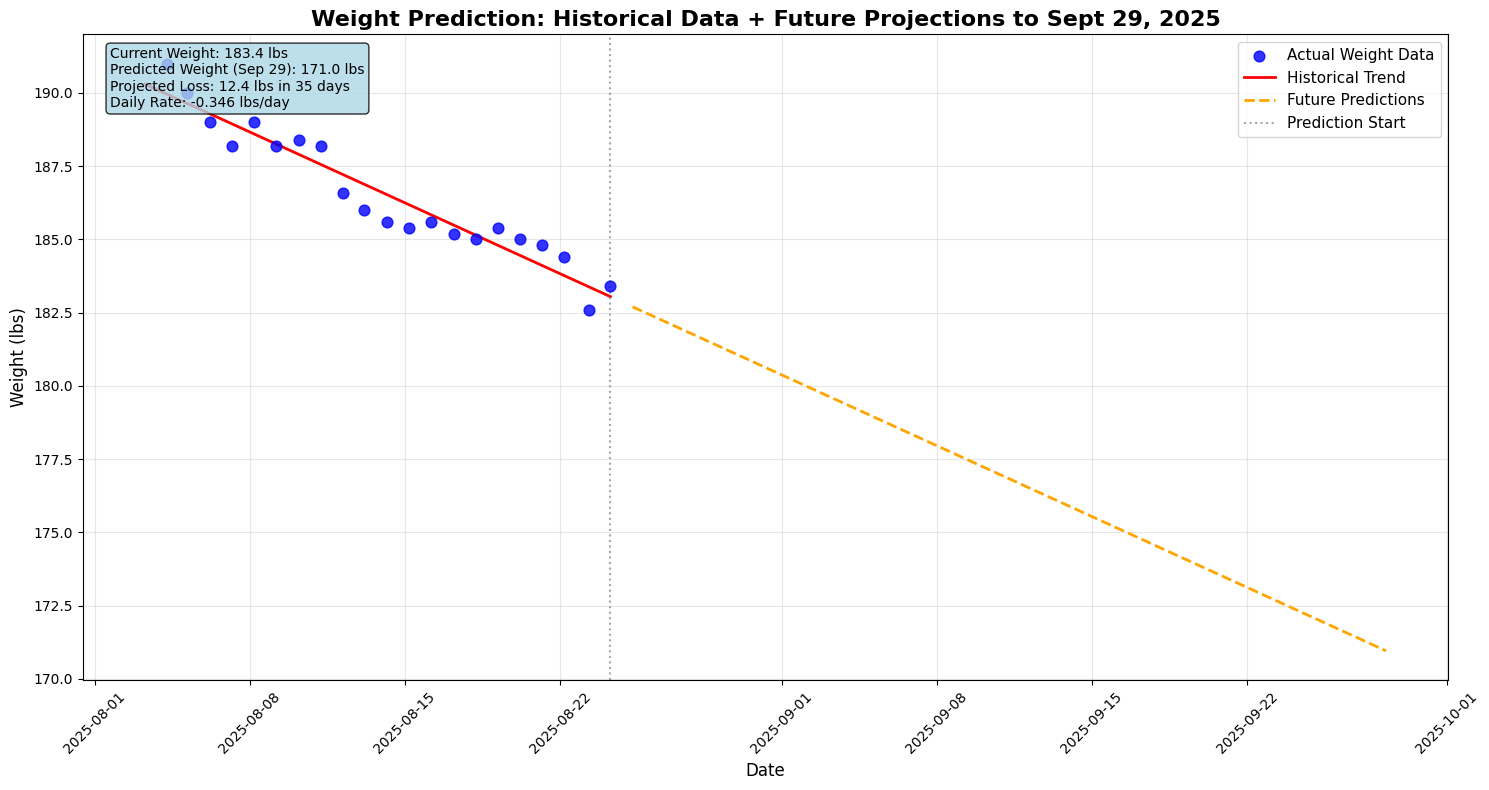


Prediction Summary:
Current weight (Aug 24): 183.4 lbs
Predicted weight (Sep 29): 171.0 lbs
Total projected weight loss: 12.4 lbs over 35 days


In [9]:
# Create extended prediction graph
plt.figure(figsize=(15, 8))

# Plot actual weight data (from df_recent)
plt.scatter(df_recent['Date/Time'], df_recent['Weight'], 
           alpha=0.8, s=60, color='blue', label='Actual Weight Data', zorder=3)

# Plot historical regression line (actual data period)
actual_mask = df_extended['Data_Type'] == 'Actual'
plt.plot(df_extended[actual_mask]['Date'], df_extended[actual_mask]['Predicted_Weight'], 
         color='red', linewidth=2, label='Historical Trend', zorder=2)

# Plot future predictions
future_mask = df_extended['Data_Type'] == 'Predicted'
plt.plot(df_extended[future_mask]['Date'], df_extended[future_mask]['Predicted_Weight'], 
         color='orange', linewidth=2, linestyle='--', label='Future Predictions', zorder=2)

# Add vertical line to separate actual vs predicted
plt.axvline(x=end_date, color='gray', linestyle=':', alpha=0.7, label='Prediction Start')

# Customize the plot
plt.title('Weight Prediction: Historical Data + Future Projections to Sept 29, 2025', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add prediction information as text - fix the indexing error
final_prediction_data = df_extended[df_extended['Date'] == prediction_end_date]
if len(final_prediction_data) > 0:
    final_predicted_weight = final_prediction_data['Predicted_Weight'].iloc[0]
else:
    # If exact date not found, get the last prediction
    final_predicted_weight = df_extended[df_extended['Data_Type'] == 'Predicted']['Predicted_Weight'].iloc[-1]

total_predicted_loss = df_recent['Weight'].iloc[-1] - final_predicted_weight
days_to_prediction = (prediction_end_date - end_date).days

prediction_text = f"Current Weight: {df_recent['Weight'].iloc[-1]:.1f} lbs\n"
prediction_text += f"Predicted Weight (Sep 29): {final_predicted_weight:.1f} lbs\n"
prediction_text += f"Projected Loss: {total_predicted_loss:.1f} lbs in {days_to_prediction} days\n"
prediction_text += f"Daily Rate: {model.coef_[0]:.3f} lbs/day"

plt.text(0.02, 0.98, prediction_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Adjust layout
plt.tight_layout()
plt.show()

print(f"\nPrediction Summary:")
print(f"Current weight (Aug 24): {df_recent['Weight'].iloc[-1]:.1f} lbs")
print(f"Predicted weight (Sep 29): {final_predicted_weight:.1f} lbs")
print(f"Total projected weight loss: {total_predicted_loss:.1f} lbs over {days_to_prediction} days")

In [10]:
# Generate Monday Predictions Table
# Find all Mondays from the current data through September 29th

# Start from the Monday after the last data point
last_data_date = end_date
next_monday = last_data_date + timedelta(days=(7 - last_data_date.weekday()) % 7)
if next_monday == last_data_date and last_data_date.weekday() != 0:
    next_monday += timedelta(days=7)

# Generate all Mondays until September 29th
mondays = []
current_monday = next_monday
while current_monday <= prediction_end_date:
    mondays.append(current_monday)
    current_monday += timedelta(days=7)

# Calculate predictions for each Monday
monday_predictions = []
for monday in mondays:
    days_from_start = (monday - start_date).total_seconds() / (24 * 3600)
    predicted_weight = model.predict([[days_from_start]])[0]
    
    # Calculate days from last actual measurement
    days_from_last = (monday - end_date).days
    
    monday_predictions.append({
        'Date': monday.strftime('%Y-%m-%d'),
        'Day': monday.strftime('%A'),
        'Predicted_Weight': round(predicted_weight, 1),
        'Days_From_Last_Data': days_from_last,
        'Weight_Change_From_Current': round(predicted_weight - df_recent['Weight'].iloc[-1], 1)
    })

# Create DataFrame for Monday predictions
monday_df = pd.DataFrame(monday_predictions)

print("📅 PREDICTED WEIGHT EVERY MONDAY")
print("=" * 60)
print(f"{'Date':<12} {'Weight (lbs)':<12} {'Days Out':<10} {'Change':<8}")
print("-" * 60)

for _, row in monday_df.iterrows():
    change_str = f"{row['Weight_Change_From_Current']:+.1f}"
    print(f"{row['Date']:<12} {row['Predicted_Weight']:<12} {row['Days_From_Last_Data']:<10} {change_str:<8}")

print("\n" + "=" * 60)
print(f"Current weight (Aug 24, 2025): {df_recent['Weight'].iloc[-1]:.1f} lbs")
print(f"Predicted rate: {model.coef_[0]:.3f} lbs/day")

# Display as a formatted table
print("\n📊 DETAILED MONDAY PREDICTIONS TABLE")
print(monday_df.to_string(index=False))

# Calculate some interesting statistics
total_mondays = len(monday_df)
final_monday_weight = monday_df['Predicted_Weight'].iloc[-1] if total_mondays > 0 else None
total_loss_by_final_monday = df_recent['Weight'].iloc[-1] - final_monday_weight if final_monday_weight else 0

print(f"\n📈 SUMMARY STATISTICS")
print(f"Number of Mondays predicted: {total_mondays}")
if total_mondays > 0:
    print(f"First Monday prediction: {monday_df['Date'].iloc[0]} - {monday_df['Predicted_Weight'].iloc[0]:.1f} lbs")
    print(f"Last Monday prediction: {monday_df['Date'].iloc[-1]} - {monday_df['Predicted_Weight'].iloc[-1]:.1f} lbs")
    print(f"Total predicted loss by final Monday: {total_loss_by_final_monday:.1f} lbs")

📅 PREDICTED WEIGHT EVERY MONDAY
Date         Weight (lbs) Days Out   Change  
------------------------------------------------------------
2025-08-25   182.7        1          -0.7    
2025-09-01   180.3        8          -3.1    
2025-09-08   177.9        15         -5.5    
2025-09-15   175.4        22         -8.0    
2025-09-22   173.0        29         -10.4   

Current weight (Aug 24, 2025): 183.4 lbs
Predicted rate: -0.346 lbs/day

📊 DETAILED MONDAY PREDICTIONS TABLE
      Date    Day  Predicted_Weight  Days_From_Last_Data  Weight_Change_From_Current
2025-08-25 Monday             182.7                    1                        -0.7
2025-09-01 Monday             180.3                    8                        -3.1
2025-09-08 Monday             177.9                   15                        -5.5
2025-09-15 Monday             175.4                   22                        -8.0
2025-09-22 Monday             173.0                   29                       -10.4

📈 SUMMARY 